In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install mplfinance
import mplfinance as mpf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.5 MB/s eta 0:00:00


In [20]:
#Import module
import Financial_analysis
import importlib
importlib.reload(Financial_analysis)

<module 'Financial_analysis' from '/content/Financial_analysis.py'>

In [27]:
#load file
Companies=["AAPL","AMZN","GOOG","MSFT","NVDA","TSLA"]
data={}
for t in range(0,len(Companies)):
 data[t]=Financial_analysis.load_file(Companies[t])
 data[t].describe()
 data[t].head()
data[1]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0
2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0
2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0


In [28]:
for i in range(0,len(Companies)):
 # Calculate moving average
 Financial_analysis.moving_av(data[i],20,"Mov_av_20")
 Financial_analysis.moving_av(data[i],50,"Mov_av_50")

 #Calculate RSI
 Financial_analysis.calculate_rsi(data[i],14)

 #Calculate MACD
 Financial_analysis.MACD(data[i])

data[0]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Mov_av_20,Mov_av_50,RSI,MACD,Signal_Line
Date,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,-0.000412,-0.000082
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,-0.001279,-0.000322
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,-0.001772,-0.000612
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,-0.001932,-0.000876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,223.969257,208.233171,46.477870,4.661981,6.677905
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.181012,208.856650,38.650946,3.748062,6.091936
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.373788,209.466544,37.019463,3.026765,5.478902


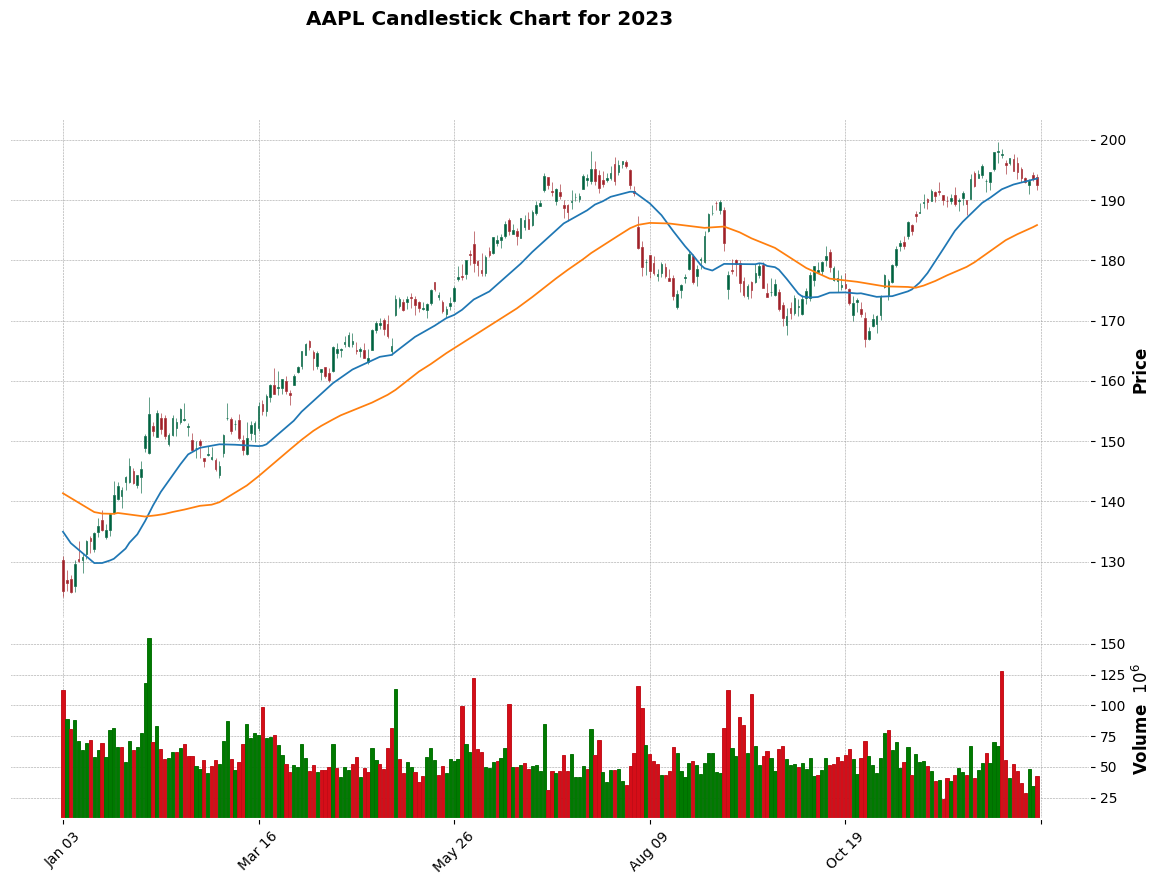

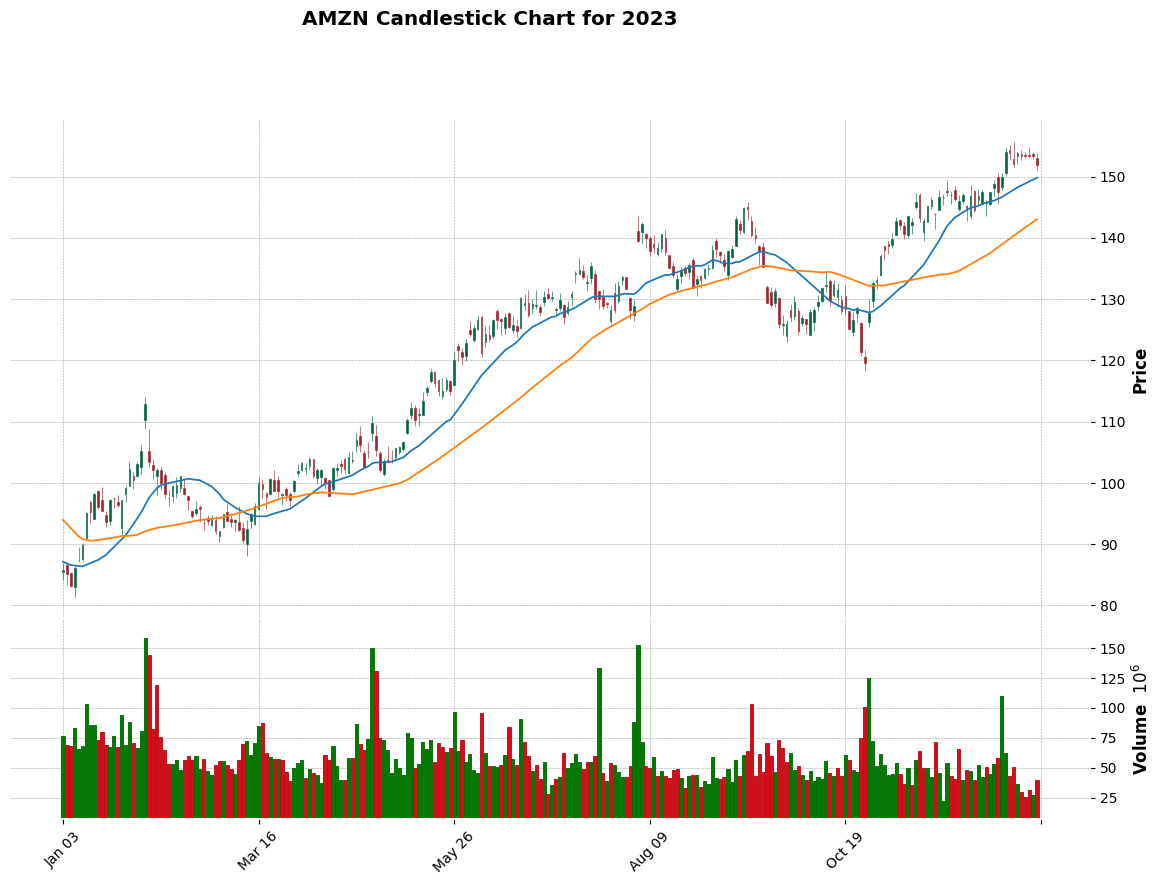

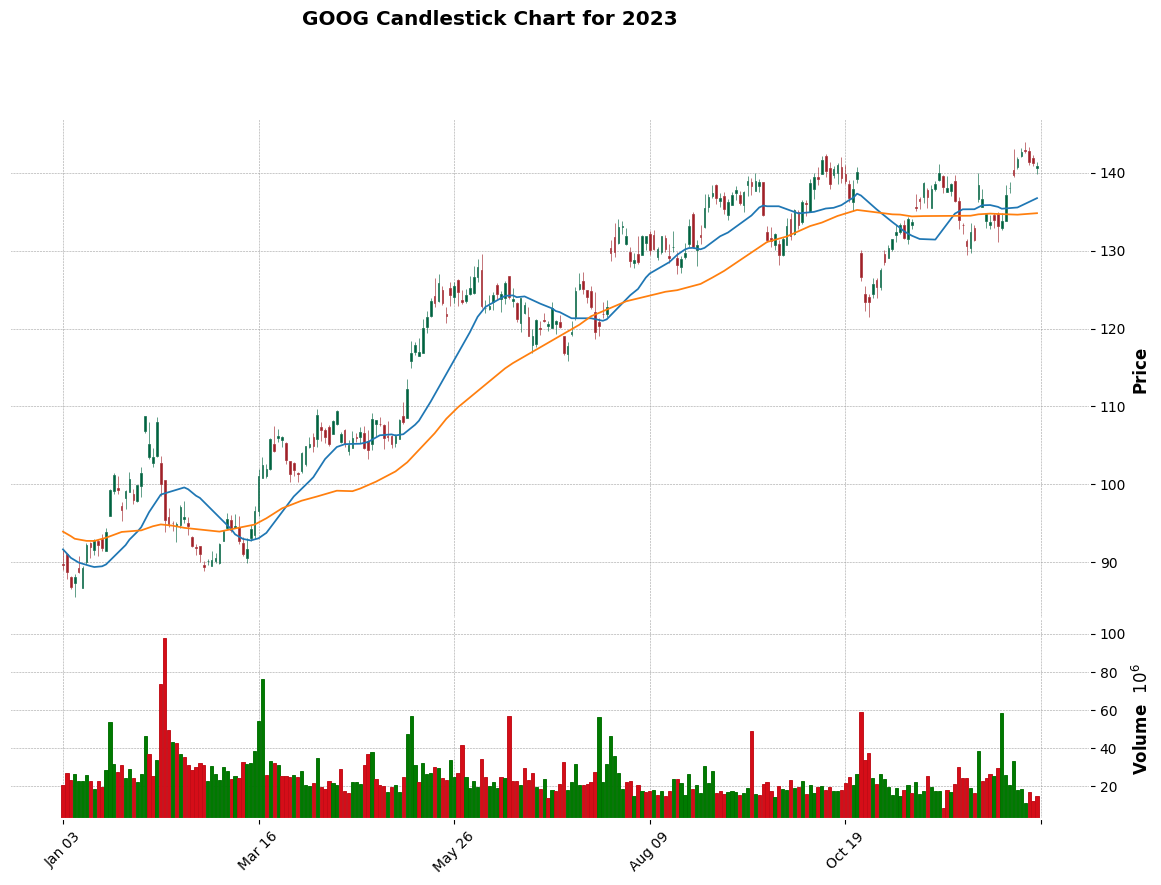

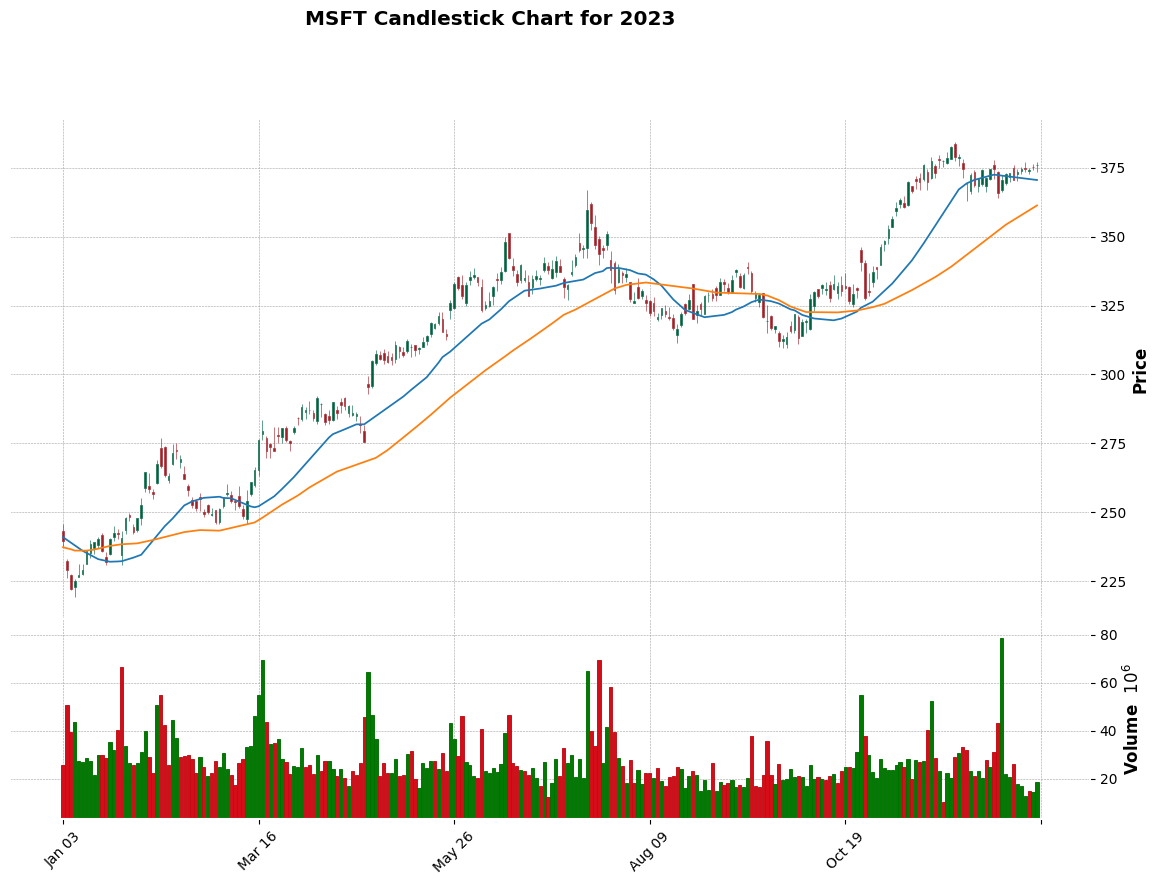

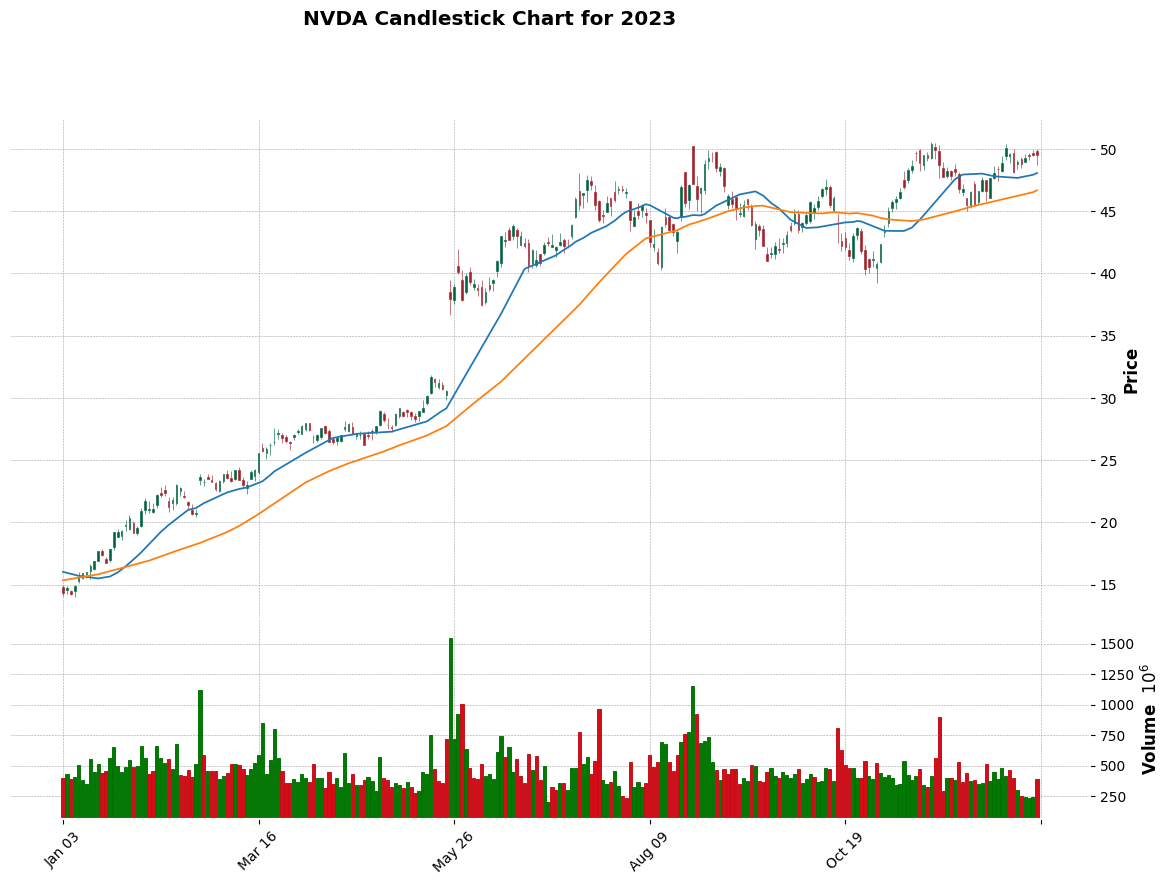

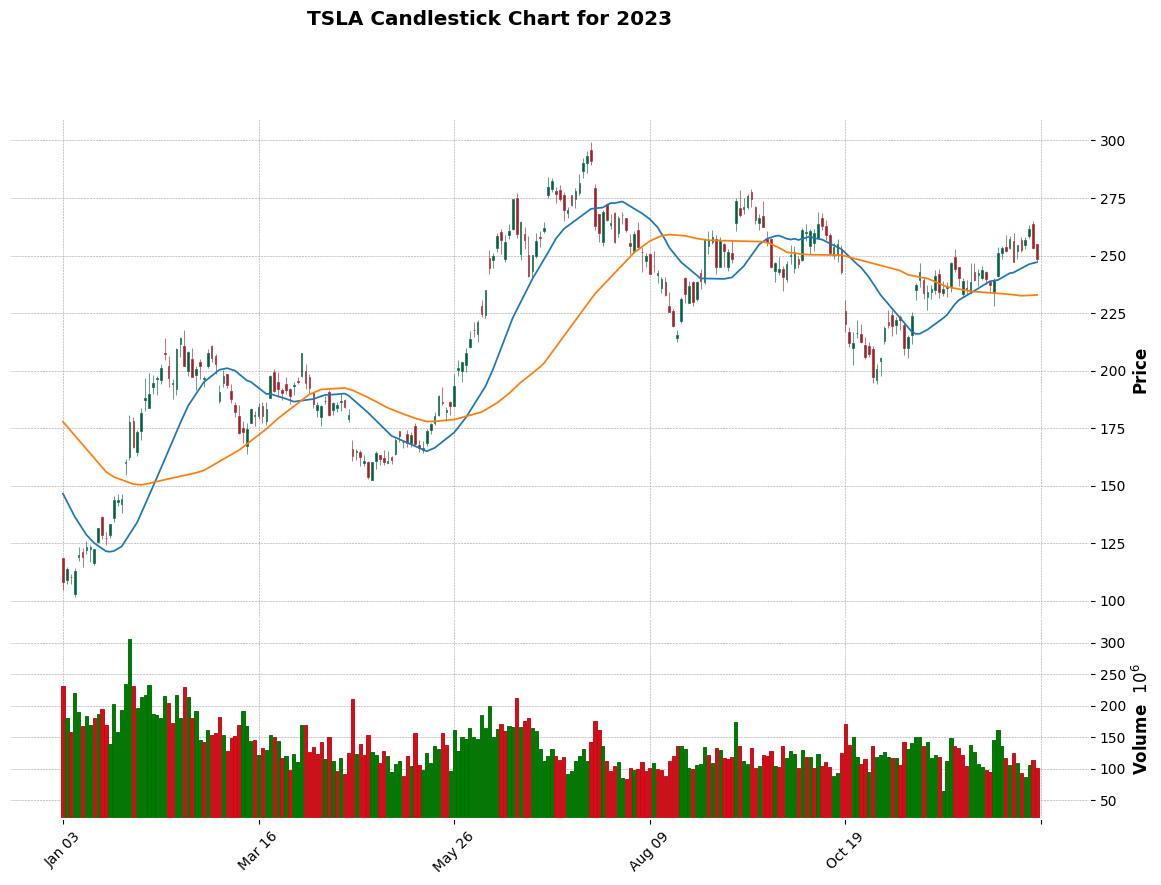

In [30]:
#Make candlestick graph
for u in range (0,len(Companies)):
 graphdf=data[u].loc['2023-01-01':'2023-12-31']
 ap = [mpf.make_addplot(graphdf['Mov_av_20']), mpf.make_addplot(graphdf['Mov_av_50']),]
 mpf.plot(graphdf, type='candle', style='charles', title=f'{Companies[u]} Candlestick Chart for 2023',volume=True, ylabel='Price',figsize=(15,10),addplot=ap)
